In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import string
#https://stackoverflow.com/questions/19726663/how-to-save-the-pandas-dataframe-series-data-as-a-figure
import six
import math

In [2]:
tbpath = "../../fits/"
productpath = "../../postfit_derivatives/"

In [3]:
rois = []
df = pd.read_csv(tbpath + 'fit_table_reweighted.csv') 
rois += list(df.roi.unique())
  
rois = list(set(rois))
rois.remove('US')
rois.remove('Gambia')
#sort within US and among other coutries then union back
roi_us = np.sort([i for i in rois if i[:2]=='US'])[::-1]
roi_other = np.sort([i for i in rois if i[:2]!='US'])[::-1]
rois = list(roi_us) + list(roi_other)



[0.00104092 0.01165663 0.02786484 0.05570219 0.15631139]


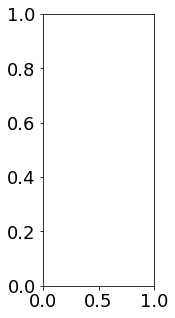

In [4]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    

def calc_globalquantiles(col):
    _025 = 0
    _25 = 0
    _5 = 0
    _75 = 0
    _975 = 0
    w = 0
    for j, roi in enumerate(rois):
        try:
            sigma2 = (df.loc[(df.roi==roi)&(df['quantile']=='std'), col].values[0])**2
            w += 1/sigma2
            _025 += 1/sigma2*df.loc[(df.roi==roi)&(df['quantile']=='0.025'), col].values[0]
            _25 += 1/sigma2*df.loc[(df.roi==roi)&(df['quantile']=='0.25'), col].values[0]
            _5 += 1/sigma2*df.loc[(df.roi==roi)&(df['quantile']=='0.5'), col].values[0]
            _75 += 1/sigma2*df.loc[(df.roi==roi)&(df['quantile']=='0.75'), col].values[0]
            _975 += 1/sigma2*df.loc[(df.roi==roi)&(df['quantile']=='0.975'), col].values[0]
        except:
            print()#print(roi)
    return _025,_25,_5,_75,_975,w

def calc_globalquantiles_searchtheta(theta):
    _025 = 0
    _25 = 0
    _5 = 0
    _75 = 0
    _975 = 0
    w = 0
    for j, roi in enumerate(rois):
        #find latest week for roi, assume that is post mitigation
        for week in range(11,0,-1):
            col = theta + " (week "+str(week)+")"
            x = df.loc[(df.roi==roi)&(df['quantile']=='std'), col].values[0]
            if np.isfinite(x) and x!='':
                break
        try:
            sigma2 = (df.loc[(df.roi==roi)&(df['quantile']=='std'), col].values[0])**2
            w += 1/sigma2
            _025 += 1/sigma2*df.loc[(df.roi==roi)&(df['quantile']=='0.025'), col].values[0]
            _25 += 1/sigma2*df.loc[(df.roi==roi)&(df['quantile']=='0.25'), col].values[0]
            _5 += 1/sigma2*df.loc[(df.roi==roi)&(df['quantile']=='0.5'), col].values[0]
            _75 += 1/sigma2*df.loc[(df.roi==roi)&(df['quantile']=='0.75'), col].values[0]
            _975 += 1/sigma2*df.loc[(df.roi==roi)&(df['quantile']=='0.975'), col].values[0]
#             print(roi)
#             print(sigma2)
#             print(week)
        
        except:
            print()#print(roi)
    return _025,_25,_5,_75,_975,w,week


def plot_global(theta,ax,q,pos):
    boxes = [
            {
#             'x': 0,
            'fontsize' : 10,
            'label' : label_[theta],
            'whislo': q[0],    # Bottom whisker position
            'q1'    : q[1],   # First quartile (25th percentile)
            'med'   : q[2],    # Median         (50th percentile)
            'q3'    : q[3],     # Third quartile (75th percentile)
            'whishi': q[4],    # Top whisker position
            'fliers': []        # Outliers
            }
        ]
    ax.bxp(boxes, widths = 1, 
            positions=[pos], showfliers=False,  patch_artist=True,#vert=False,
               boxprops=dict(facecolor='none',edgecolor='gray'))
    return 

# roi = rois[0]
# col = theta
# print(df.loc[(df.roi==roi)&(df['quantile']=='0.025'), col])

# df['quantile']

label_ = {}
label_['R0'] = r'R$_{0}$'
label_['Rt'] = 'week of April 15th, 2020'
label_['car (week 0)'] = 'week 0'
label_['car'] = 'week of April 15th, 2020'
label_['ifr (week 0)'] = 'week 0'
label_['ifr'] = 'week of April 15th, 2020'
label_['q'] = ''

theta = 'q'
# f,ax = plt.subplots(1,1,figsize=(20,5))
f,ax = plt.subplots(1,1,figsize=(2,5))

_025,_25,_5,_75,_975,w = calc_globalquantiles(theta)
q = np.array([_025,_25,_5,_75,_975])/w
print(q)
# plot_global(theta,ax,q,0)

# theta = 'ifr'

# _025,_25,_5,_75,_975,w,week = calc_globalquantiles_searchtheta(theta)
# q = np.array([_025,_25,_5,_75,_975])/w
# print(q)

# plot_global(theta,ax,q,1.2)


# x = np.array([0.05]+list(np.arange(0.1,1.1,0.1)))
# ax.set_xticks(x)
# ax2 = ax.twiny()
# ax2.set_xticks(x)
# ax2.set_xticklabels(np.round(1/x,1))
# ax2.set_xlabel('fold difference in unknown vs known cases')
# ax.set_xlabel(r'% CAR$_{t}$')
# ax.set_xlabel(r'% IFR$_{t}$')
# ax.set_xlabel(r'R$_{t}$')
# ax.set_xlabel('q')

# simpleaxis(ax)
# ax.set_xlim((-1,2))
# ax.set_ylim((0,0.2))
# ax2.set_xlim((0,0.5))
# plt.subplots_adjust(left=0.2,top=0.8,bottom=0.2)

# plt.subplots_adjust(left=0.4,top=0.9,bottom=0.2)

# plt.savefig(productpath + theta + '_barplot.png')
